In [1]:
## This file is part of Jax Geometry
#
# Copyright (C) 2021, Stefan Sommer (sommer@di.ku.dk)
# https://bitbucket.org/stefansommer/jaxgeometry
#
# Jax Geometry is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# Jax Geometry is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Theano Geometry. If not, see <http://www.gnu.org/licenses/>.
#

# Euclidean geometry

In [2]:
%load_ext autoreload
%autoreload 2

Euclidean manifold of dimension 2


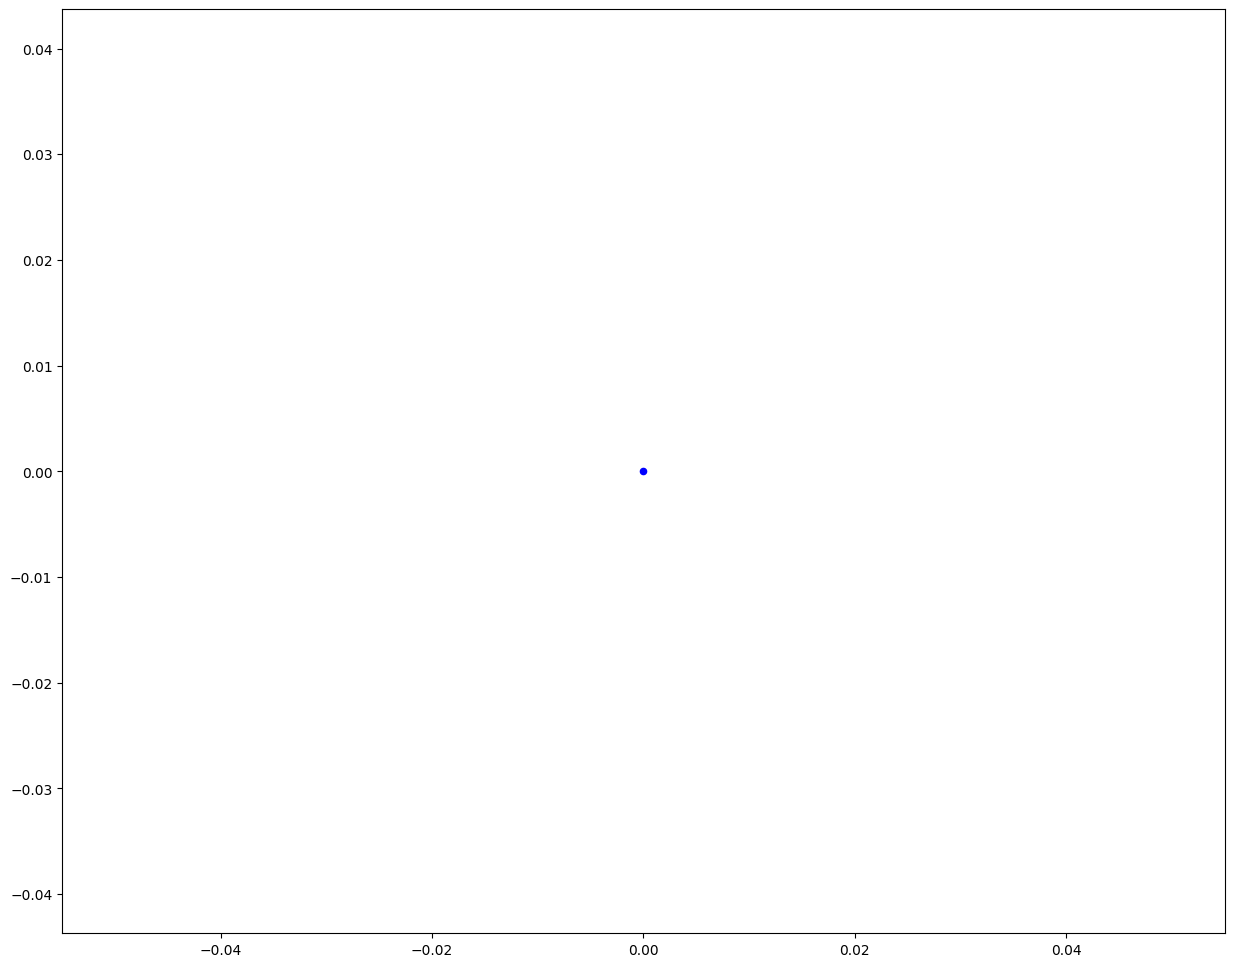

In [3]:
from src.manifolds.Euclidean import *
M = Euclidean(2)
print(M)

M.newfig()
M.plot()
M.plotx(M.coords([0.,0.]))
from src.plotting import *
#%matplotlib notebook

x =  (Array([0., 0.], dtype=float32), Array([0.], dtype=float32))
v =  [1.5707964 0.       ]


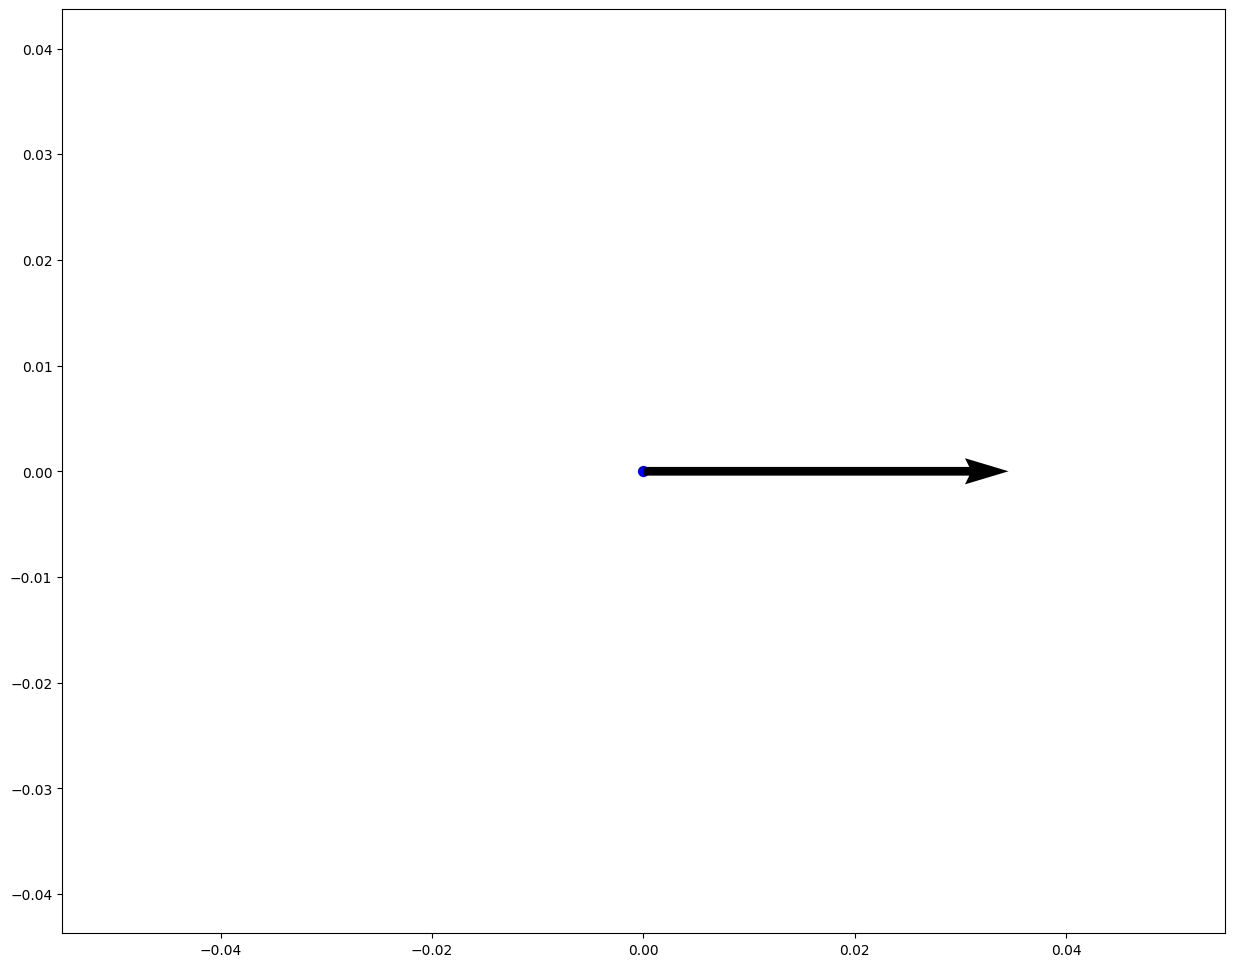

In [4]:
# element, tangent vector and covector
x = M.coords([0.,0.])
v = jnp.array([np.pi/2,0.])

print("x = ", x)
print("v = ", v)

# plot
M.newfig()
M.plot()
M.plotx(x,u=v,linewidth = 1.5, s=50)
plt.show()

In [5]:
## Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

print("g(x):\n",M.g(x))
print("g^#(x):\n",M.gsharp(x))
print("\Gamma(x):\n",M.Gamma_g(x))

# covector
p = M.flat(x,v)
print("v: ",v,", p: ",p,", p^#: ",M.sharp(x,p))

g(x):
 [[1. 0.]
 [0. 1.]]
g^#(x):
 [[1. 0.]
 [0. 1.]]
\Gamma(x):
 [[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
v:  [1.5707964 0.       ] , p:  [1.5707964 0.       ] , p^#:  [1.5707964 0.       ]


## Riemannian Geodesics

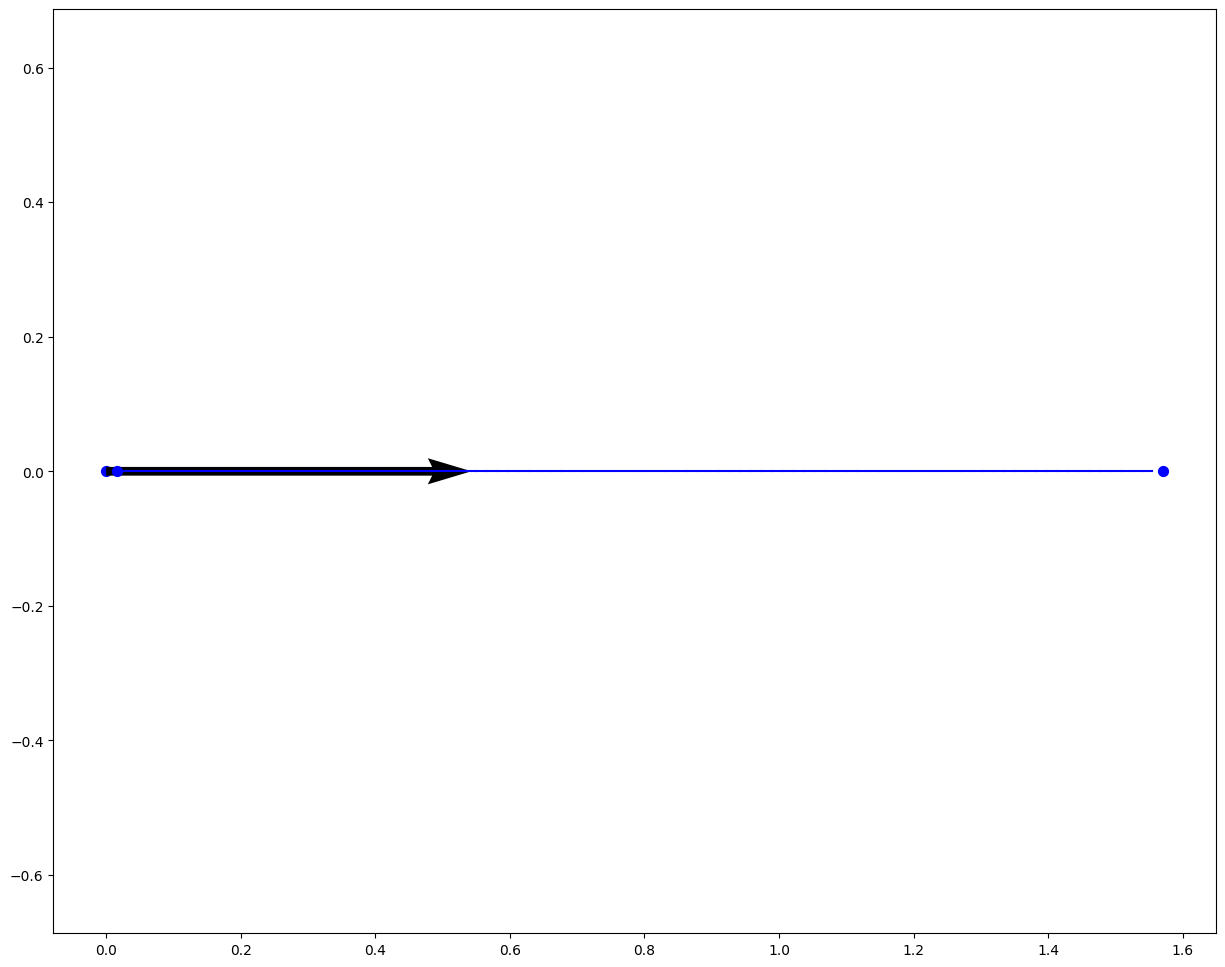

In [6]:
# 2nd order geodesic equation 
from src.Riemannian import geodesic
geodesic.initialize(M)

# compute geodesics
(xs,charts) = M.Expt(x,v)

# plot
M.newfig()
M.plot()
M.plotx(x,u=v,linewidth = 1.5, s=50)
M.plot_path(zip(xs,charts),linewidth = 1.5, s=50)
plt.show()

### Geodesics from Hamiltonian equations

1.2337006


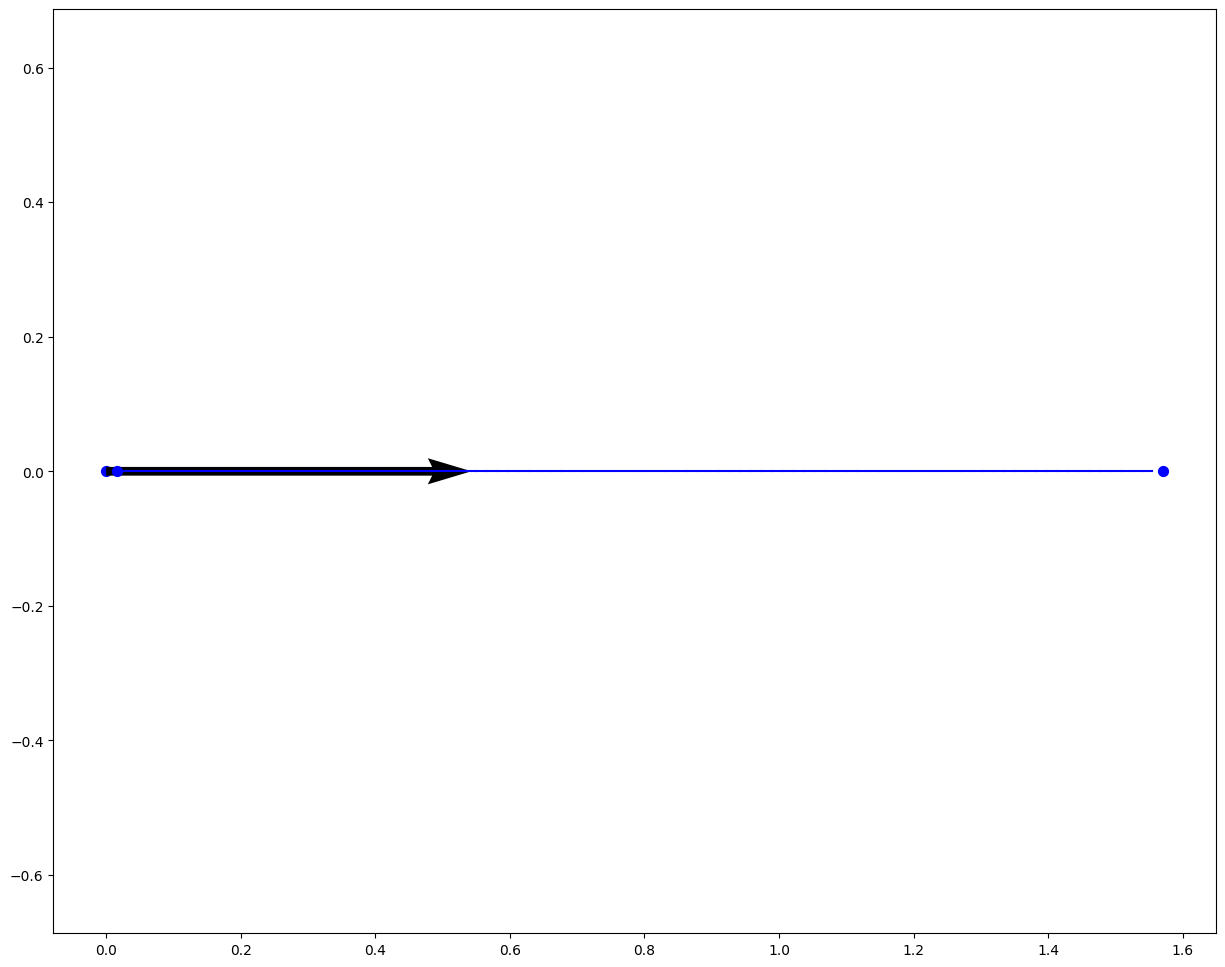

Energy:  [1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006
 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.2337006 1.23370

In [7]:
# # Hamiltonian dynamics
q = x
print(M.H(q,p))

from src.dynamics import Hamiltonian
Hamiltonian.initialize(M)

# Exponential map from Hamiltonian equations
(qs,charts) = M.Exp_Hamiltoniant(q,p)

# plot
M.newfig()
M.plot()
M.plotx(x,u=v,linewidth = 1.5, s=50)
M.plot_path(zip(qs,charts),linewidth = 1.5, s=50)
plt.show()

# dynamics returning both position and momentum
(ts,qps,_) = M.Hamiltonian_dynamics(q,p,dts())
ps = qps[:,1,:]
print("Energy: ",np.array([M.H((q,chart),p) for (q,p,chart) in zip(qs,ps,charts)]))

## Curvature

In [8]:
from src.Riemannian import curvature
curvature.initialize(M)
 
# Curvature tensor, Ricci and scalar curvature:
print("curvature = ", M.R(x))
print("Ricci curvature = ", M.Ricci_curv(x))
print("Scalar curvature = ", M.S_curv(x))

# Orthonormal basis under g:
nu = jnp.linalg.cholesky(M.gsharp(x))

# # Sectional Curvature
# print("sectional curvature = ",M.sec_curv(x,nu[:,0],nu[:,1]))

curvature =  [[[[-0. -0.]
   [-0. -0.]]

  [[-0. -0.]
   [-0. -0.]]]


 [[[-0. -0.]
   [-0. -0.]]

  [[-0. -0.]
   [-0. -0.]]]]
Ricci curvature =  [[0. 0.]
 [0. 0.]]
Scalar curvature =  0.0


## Parallel Transport

In [9]:
# Parallel transport
from src.Riemannian import parallel_transport
parallel_transport.initialize(M)

chart = M.chart()
w = np.array([-1./2,-1./2])
w = w/M.norm(x,w)
t = np.cumsum(dts())
xs = np.vstack([t**2,-np.sin(t)]).T
dxs = np.vstack([2*t,-np.cos(t)]).T

# compute  parallel transport
ws = M.parallel_transport(w,dts(),xs,np.tile(chart,(n_steps,1)),dxs)
print("ws norm: ",np.array([M.norm((x,chart),w) for (x,w,chart) in zip(xs,ws,charts)]))

ws norm:  [0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999

## Brownian Motion

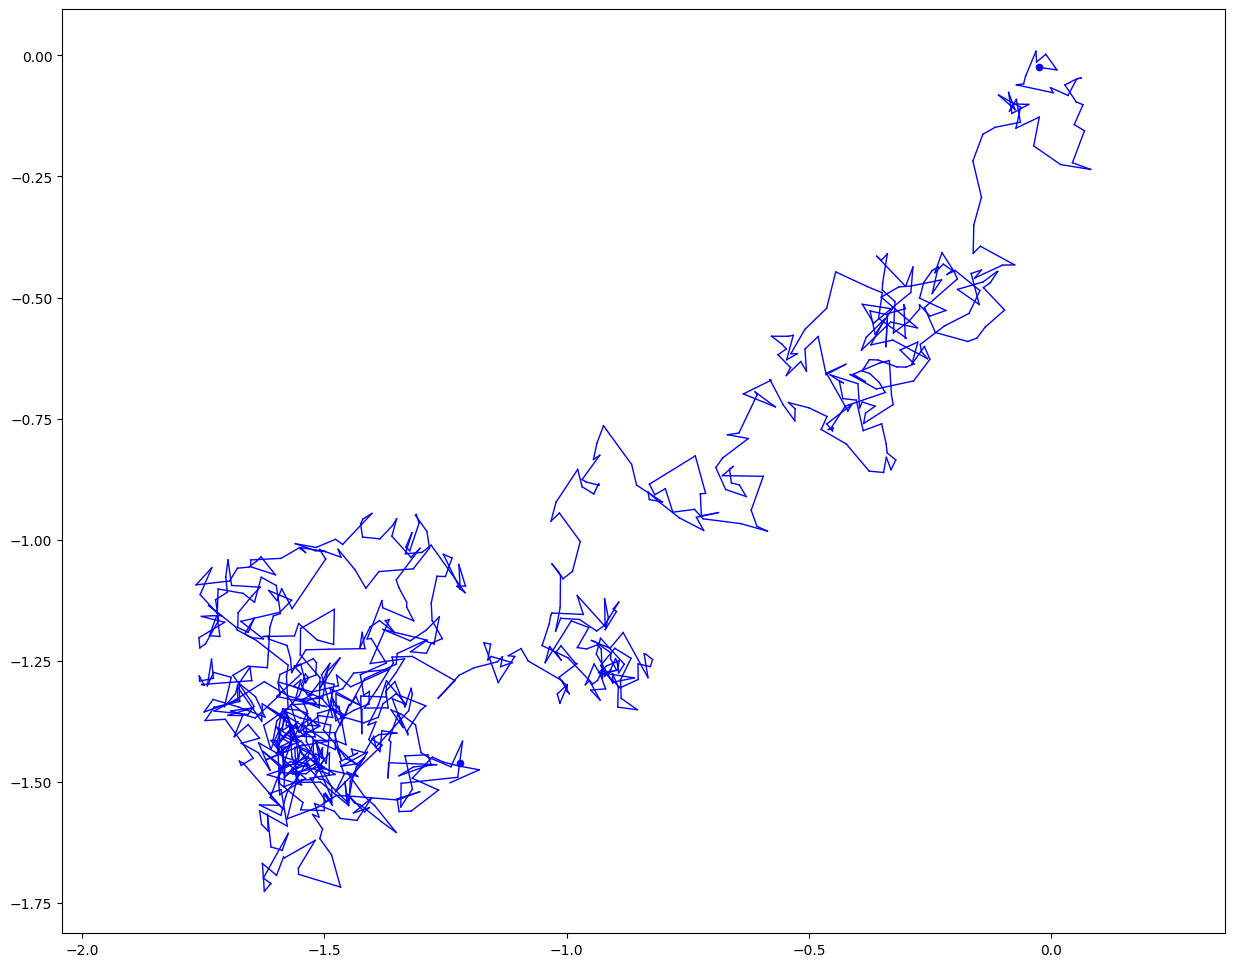

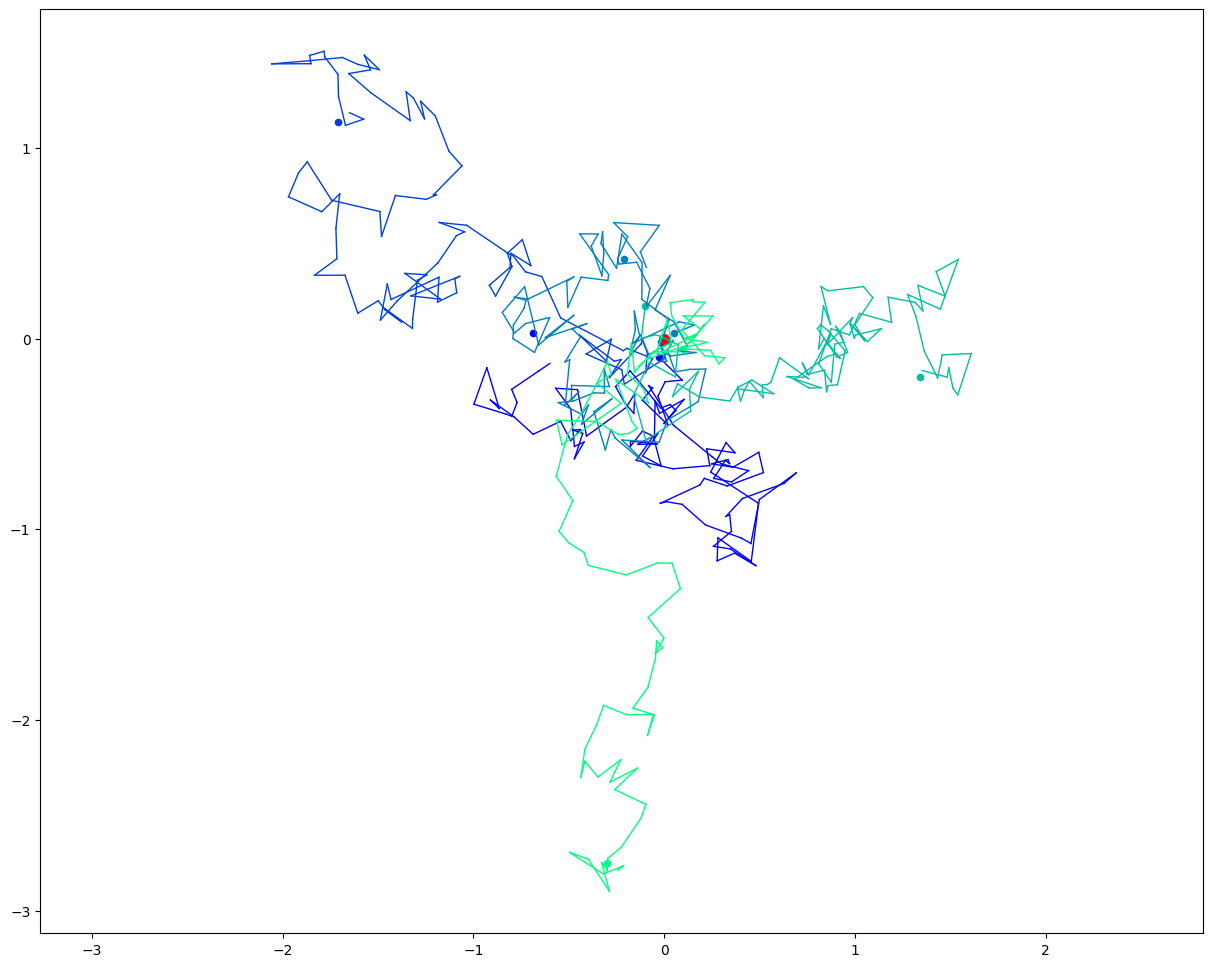

In [10]:
# coordinate form
from src.stochastics import Brownian_coords
Brownian_coords.initialize(M)

_dts = dts(n_steps=1000)
(ts,xs,charts) = M.Brownian_coords(x,_dts,dWs(M.dim,_dts))

# plot
M.newfig()
M.plot()
M.plot_path(zip(xs,charts))
plt.show()

# plot multiple sample paths
N = 5
xss = np.zeros((N,n_steps,M.dim))
chartss = np.zeros((N,n_steps,x[1].shape[0]))
for i in range(N):
    (ts,xs,charts) = M.Brownian_coords(x,dts(),dWs(M.dim))
    xss[i] = xs
    chartss[i] = charts

# plot
M.newfig()
M.plot()
colormap = plt.get_cmap('winter')
colors=[colormap(k) for k in np.linspace(0, 1, N)]
for i in range(N):
    M.plot_path(zip(xss[i],chartss[i]),color=colors[i])
M.plotx(x,color='r',s=50)
plt.show()